In [403]:
import torch
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [404]:
#given code
def image_arrs(paths, im_arr):
    for path in paths:
        image = cv2.imread(path)
        image_from_array = Image.fromarray(image, 'RGB')
        #resize
        size_image = image_from_array.resize((30,30))
        image_arr = np.array(size_image.getdata(),np.uint8).reshape(size_image.size[1], size_image.size[0],3)
        im_arr.append(image_arr.flatten())
    return im_arr

In [405]:
#given code
#all file paths from classes 1-5
df = pd.read_csv('Train.csv')

paths1 = df[(df['ClassId'] ==1)]['Path'].values
paths2 = df[(df['ClassId'] ==2)]['Path'].values
paths3 = df[(df['ClassId'] ==3)]['Path'].values
paths4 = df[(df['ClassId'] ==4)]['Path'].values
paths5 = df[(df['ClassId'] ==5)]['Path'].values

class1_arrs = []
class1_arrs = image_arrs(paths1, class1_arrs)

class2_arrs = []
class2_arrs = image_arrs(paths2, class2_arrs)

class3_arrs = []
class3_arrs = image_arrs(paths3, class3_arrs)

class4_arrs = []
class4_arrs = image_arrs(paths4, class4_arrs)

class5_arrs = []
class5_arrs = image_arrs(paths5, class5_arrs)

In [406]:
print(len(class1_arrs[0]))

2700


In [407]:
#given code
#concat data/labels
X = class1_arrs + class2_arrs + class3_arrs + class4_arrs + class5_arrs
y = (len(class1_arrs)*[0]) + (len(class2_arrs)*[1]) + (len(class3_arrs)*[2]) + (len(class4_arrs)*[3]) + (len(class5_arrs)*[4])

In [408]:
#given code - split data
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state = 0)

In [409]:
#given code - convert from np array to tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [410]:
#train data?
train_data = []
for i in range(len(X_train)):
    train_data.append([X_train[i], y_train[i]])

test_data = []
for i in range(len(X_test)):
    test_data.append([X_test[i], y_test[i]])
    
trainset = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

In [411]:
total = 0
for each in trainset:
    total += 1
print(total)

778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


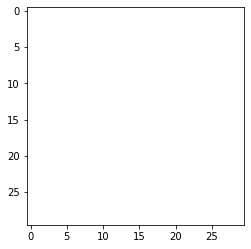

In [418]:
x, y = each[0][0], each[1][0]

print(y)
#why doesn't it show the actual sign?
plt.imshow(x.view(30,30,3))
plt.show()

<h3> Build NN 

In [413]:
class Net(nn.Module):
    
    #define layers
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2700, 10)
        self.fc2 = nn.Linear(10,30)
        self.fc3 = nn.Linear(30,60)
        self.fc4 = nn.Linear(60,60)
        self.fc5 = nn.Linear(60,60)
        self.fc6 = nn.Linear(60,30)
        self.fc7 = nn.Linear(30,5)
        
    #passing through each layer
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2700, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=60, bias=True)
  (fc5): Linear(in_features=60, out_features=60, bias=True)
  (fc6): Linear(in_features=60, out_features=30, bias=True)
  (fc7): Linear(in_features=30, out_features=5, bias=True)
)


In [414]:
#random input to make sure it works
randoms = torch.rand(2700)
randoms = randoms.view(-1, 2700)

output = net(randoms)
print(output)

tensor([[-1.6491, -1.5787, -1.4623, -1.6388, -1.7395]],
       grad_fn=<LogSoftmaxBackward>)


In [415]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

EPOCHS = 1000

for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        #want gradient to be 0 each time
        net.zero_grad()
        output = net(X.view(-1,2700))
        loss = criterion(output, y)
        #backpropagating the loss
        loss.backward()
        #taking the steps to decrease loss
        optimizer.step()
    if epoch%100 == 0:
        print(loss)
        
        

tensor(1.6588, grad_fn=<NllLossBackward>)
tensor(1.6229, grad_fn=<NllLossBackward>)
tensor(1.5704, grad_fn=<NllLossBackward>)
tensor(1.5781, grad_fn=<NllLossBackward>)
tensor(1.6259, grad_fn=<NllLossBackward>)
tensor(1.5265, grad_fn=<NllLossBackward>)
tensor(1.6746, grad_fn=<NllLossBackward>)
tensor(1.6145, grad_fn=<NllLossBackward>)
tensor(1.6270, grad_fn=<NllLossBackward>)
tensor(1.5694, grad_fn=<NllLossBackward>)
